# Homework 3.1: Kernel Interpolation

Design a new kernel other than the ones that was mentioned during the class and perform kernel interpolation.

The kernels should meet property:
$$
K(x)=\left\{\begin{array}{cc}
1 & x=0 \\
0 & x=k \Delta x
\end{array}\right.
$$
Discuss how the shape of the kernel function affects the shape of interpolated function.

## Answer

Many different Kernels exist (see [Wikipedia](https://en.wikipedia.org/wiki/Kernel_(statistics))), and many used in praxis (such as the Gaussian Kernel) do not even meet the imposed property. 

A Kernel influences the shape of the interpolated function in several ways:
- A wider Kernel (i.e. a larger bandwidth or a Kernel defined over a larger support) will make the interpolated function smoother. 
- Conversely, a narrower ("pointier") Kernel will result in more local interpolation, which puts more weight in the nearest known points. 
- A smoother/continuous Kernel will generally yield a smoother interpolated function. For example, the "sample and hold" method will create large jumps at every known point, while a Quadratic Kernel will make the function continuous at known points.
- The shape of the Kernel itself dictates the shape of the resulting interpolated function, because interpolating a function using Kernels is essentially overlaying and adding differently scaled and shifted Kernel functions together.


We pick a few promising candidates and perform interpolation using the given code:
- The Uniform or "Top Hat" Kernel yields an interpolated function which at unknown points is the average between the next two known points. It is similar to the "sample and hold" method, but will (theoretically) yield a lower mean interpolation error.
- The Parabolic Kernel does not adhere to our rules (being roughly $0.75$ at $x=0$), but shall serve as an example how such a Kernel can be used to interpolate a function. It does not directly interpolate the known points exactly, but in fact, in reality, this is often not a requirement due to noise.

We can use our prior knowledge about the sampled points and use a [sinusoid](https://en.wikipedia.org/wiki/Sinc_function) Kernel given by:
$$K(x,x^{\prime}, \Delta x) = \textrm{sinc}(\frac{|x-x^\prime|}{\Delta x})=\frac{\sin(\pi\cdot\frac{|x-x^\prime|}{\Delta x})}{\pi\cdot\frac{|x-x^\prime|}{\Delta x}}$$

We use two examples:
- An unbounded sinc-Kernel and
- A bounded (domain $[-1,1]$) sinc-Kernel

Both yield interpolated functions which are similar enough to the original sine function, but do not retrieve it exactly (the reason being that our original function has period 4 and we use a sine of period $2\Delta x=1$).

Lastly, we use cubic splines just because they're cool:
- Cubic splines ensure that at the known points, not only the first derivatives of the left and right curve segments match (such as with the Quadratic Kernel), but also the second derivatives. This results in an even smoother function!

Below are plots of the mentioned Kernels as well as how they interpolate our given data.

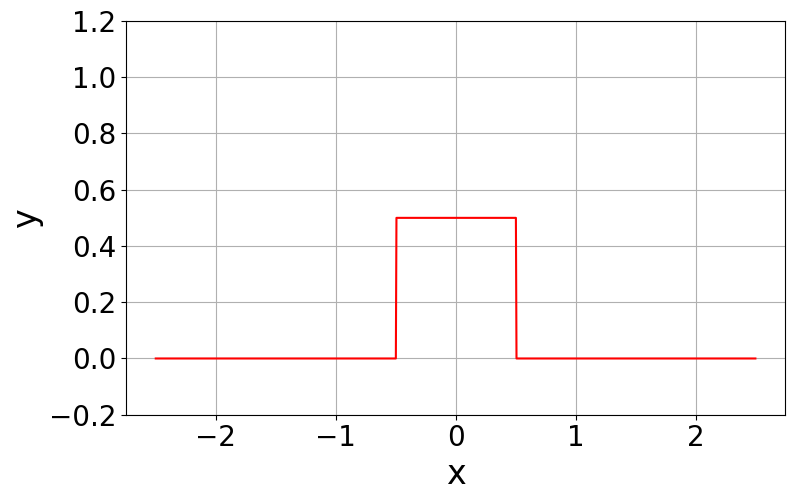

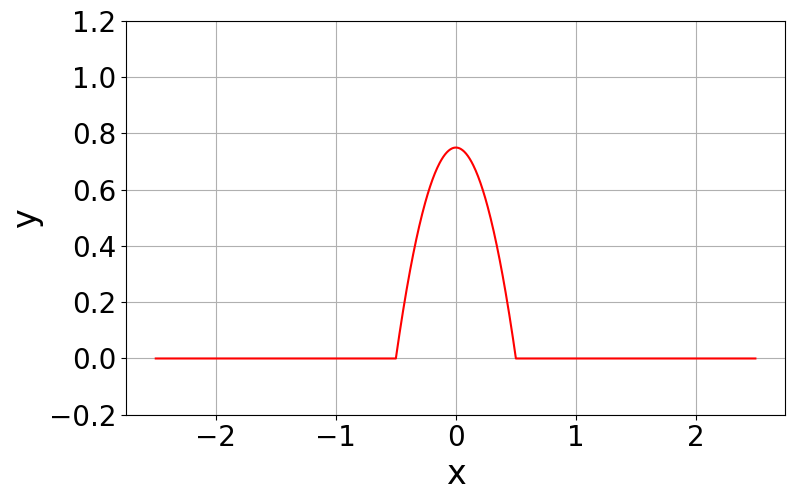

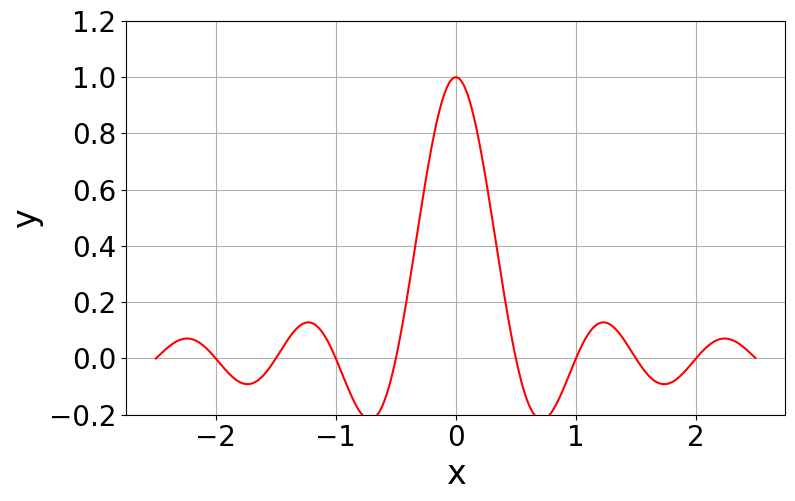

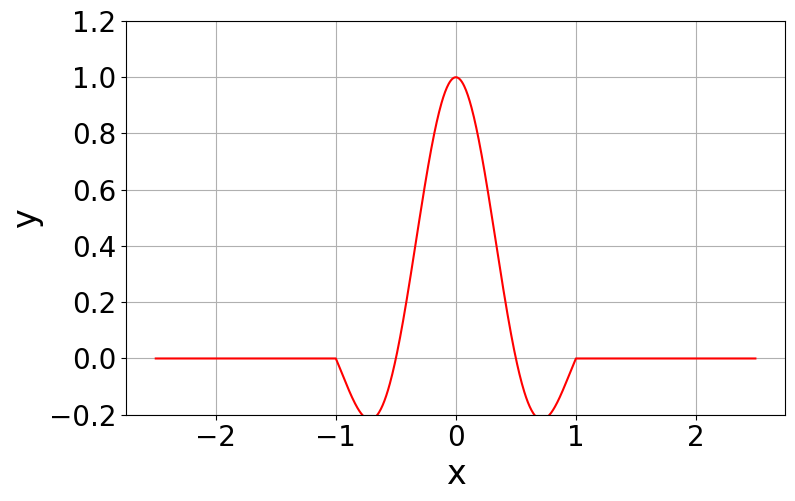

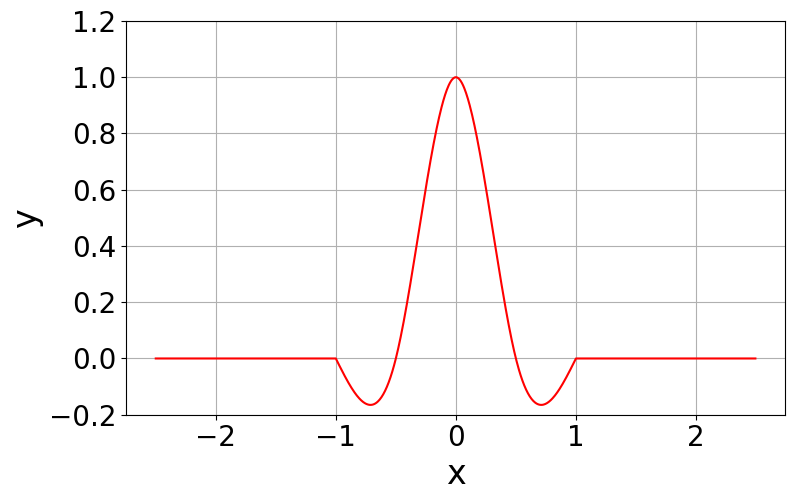

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Uniform(x, dx):
  x_n = x / dx # normalize x 
  if np.abs(x_n) == 0:
    kernel = 1
  elif np.abs(x_n) < 1:
    kernel = 0.5
  else:
    kernel = 0
  return kernel

def Parabolic(x, dx):
  x_n = x / dx # normalize x 
  if np.abs(x_n) <= 1:
    kernel = 3/4 * (1-x_n**2)
  else:
    kernel = 0
  return kernel

def Sinc(x, dx):
  x_n = x / dx # normalize x 
  if x_n == 0:
    kernel = 1
  elif np.abs(x_n) < 2:
    kernel = np.sin(np.pi*x_n)/(np.pi*x_n)
  else:
    kernel = np.sin(np.pi*x_n)/(np.pi*x_n) # alternative: kernel = 0
  return kernel

def BoundedSinc(x, dx):
  x_n = x / dx # normalize x 
  if x_n == 0:
    kernel = 1
  elif np.abs(x_n) < 2:
    kernel = np.sin(np.pi*x_n)/(np.pi*x_n)
  else:
    kernel = 0
  return kernel

def Cosine(x, dx):
  x_n = x / dx # normalize x 
  if x_n == 0:
    kernel = 1
  elif np.abs(x_n) < 1:
    kernel = np.cos(np.pi*x_n/2)
  else:
    kernel = 0
  return kernel

def CubicSpline(x, dx):
  x_n = x / dx # normalize x 
  if np.abs(x_n) < 1:
    kernel = 1.1429*np.abs(x_n)**3 - 2.1429*x_n**2 + 1
  elif np.abs(x_n) < 2:
    kernel = -0.42857*np.abs(x_n)**3 + 2.5714*x_n**2 - 4.7143* np.abs(x_n) + 2.5714
  else:
    kernel = 0
  return kernel

def PlotKernel(kernel_fn, dx):
  # plot Kernel
  x_space = np.arange(-2.5, 2.5, 0.005)
  y_space = np.zeros_like(x_space)

  for idx, xii in enumerate(x_space):
    y_space[idx] = kernel_fn(xii, dx)
  
  fig, ax = plt.subplots(figsize = (8,5))
  line, = ax.plot(x_space, y_space,  markersize=5, color='red')
  ax.axes.tick_params(labelsize=20)
  ax.set_xlabel("x", fontsize=24)
  ax.set_ylabel("y", fontsize=24)
  ax.set_ylim([-0.2,1.2])
  ax.grid()
  fig.tight_layout()

dx = 0.5
PlotKernel(Uniform, dx)
PlotKernel(Parabolic, dx)
PlotKernel(Sinc, dx)
PlotKernel(BoundedSinc, dx)
PlotKernel(CubicSpline, dx)

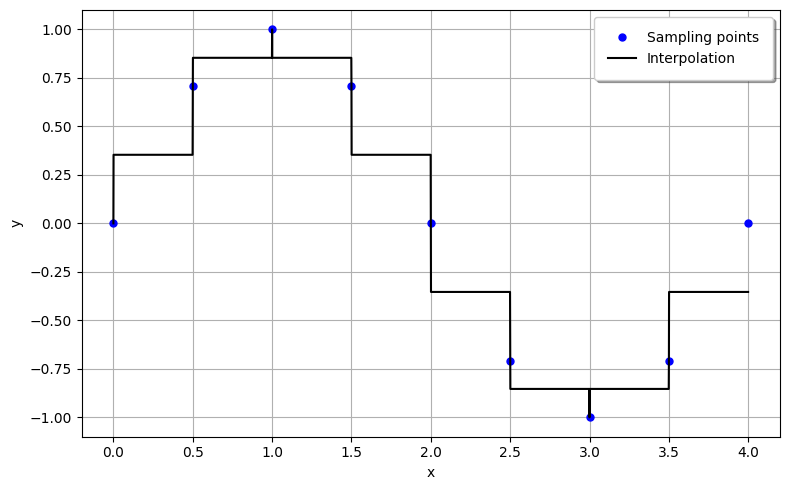

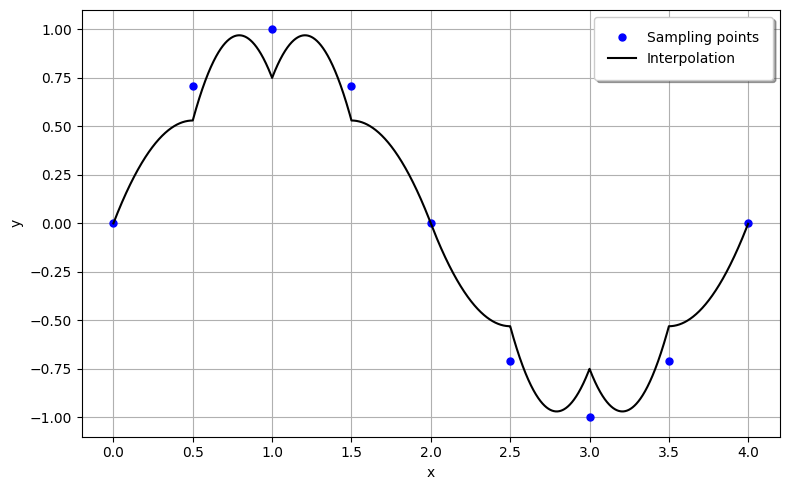

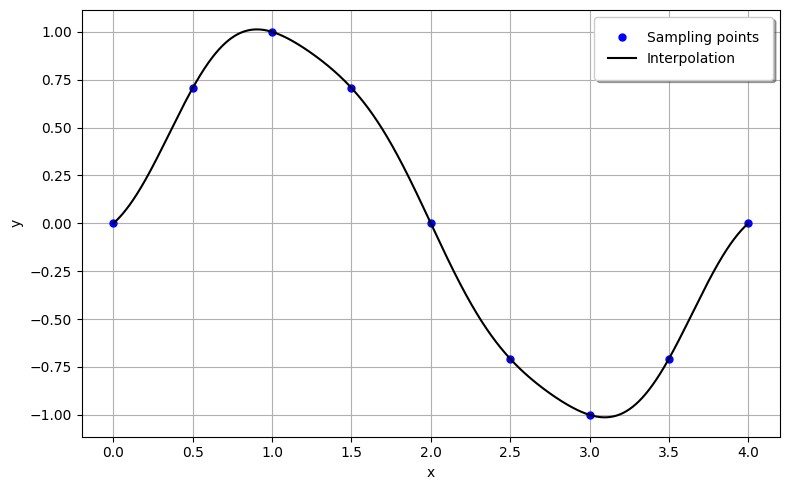

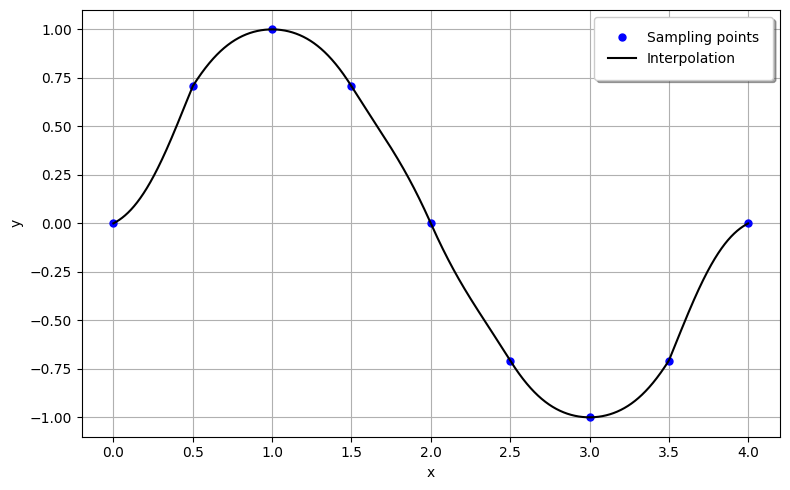

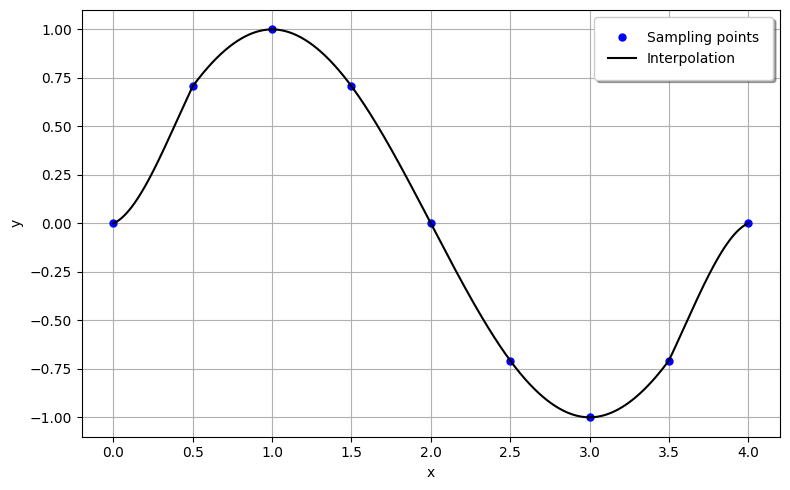

In [2]:
def ConvolutionInterpolation(x, kernel_fn, dx, y_sample):
  y_sum = 0
  for idx, yi in enumerate(y_sample):
    y_sum += yi * kernel_fn(x - idx*dx, dx)
  return y_sum

def PlotInterpolation(x_sample, y_sample, kernel_fn, dx):
  # plot Kernel
  x_space = np.arange(0, 4.0, 0.001)
  y_space = np.zeros_like(x_space)

  for idx, x in enumerate(x_space):
    y_space[idx] = ConvolutionInterpolation(x, kernel_fn, dx, y_sample)
  
  fig, ax = plt.subplots(figsize = (8,5))
  line, = ax.plot(x_sample, y_sample, 'o', markersize=5, color='blue', label='Sampling points')    
  line, = ax.plot(x_space, y_space,  markersize=5, color='black', label='Interpolation')
  ax.legend(shadow=True, borderpad=1, fontsize=10, loc='best')
  ax.axes.tick_params(labelsize=10)
  ax.set_xlabel("x", fontsize=10)
  ax.set_ylabel("y", fontsize=10)
  ax.grid()
  fig.tight_layout()

# Get x y values of the sine wave
x_sample = np.arange(0, 4.1, 0.5);
y_sample = np.sin(np.pi/2*x_sample)

PlotInterpolation(x_sample, y_sample, Uniform, dx)
PlotInterpolation(x_sample, y_sample, Parabolic, dx)
PlotInterpolation(x_sample, y_sample, Sinc, dx)
PlotInterpolation(x_sample, y_sample, BoundedSinc, dx)
PlotInterpolation(x_sample, y_sample, CubicSpline, dx)